In [ ]:
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.util import ngrams

In [ ]:
train_data = pd.read_csv("F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Train\Sylhet Train Translation.csv")
test_data = pd.read_csv("F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Test\Sylhet Test Translation.csv")
validation_data = pd.read_csv("F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Validation\Sylhet Validation Translation.csv")

In [ ]:
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()
validation_data.columns = validation_data.columns.str.strip()

In [ ]:
train_data.head(5)

,bangla_speech,banglish_speech,sylhet_bangla_speech,sylhet_banglish_speech,region_name,english_speech
0,কেমন আছো ?,kemon acho?,ভালা আছনি?,vala achoni?,Sylhet,How are you?
1,আজকে আমার মন ভালো নেই,ajke amr mon valo nei,আইজকু আমার মন ভালা নায়,aijku amar mon vala nay,Sylhet,I'm not feeling well today
2,তুমি কি করো ?,tumi ki koro?,তুমি কিতা খরো?,tumi kita khoro?,Sylhet,what are you doing
3,এই গরমে আমার কিছু ভালো লাগে না,ei gorome amar kichu valo lage na,অউ গরমো আমার কুনতা ভালা লাগের না,ou gormo amar kunta vala lager na,Sylhet,I don't like anything this summer
4,ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল,cheleti sada ronger ekti shirt pore eshechilo,ফুয়াটায় এখটা সাদা রংগর শার্ট পিন্দিয়া আইছিল,fuyatay ekhta sada ronggor shirt pindiya aichilo,Sylhet,The boy came wearing a white shirt


In [ ]:
train_data.tail(5)

,bangla_speech,banglish_speech,sylhet_bangla_speech,sylhet_banglish_speech,region_name,english_speech
1870,কাউকে মিথ্যা বলে খুশী করার থেকে সত্যি বলে কাঁদ...,kauke mittha bole khushi korar theke sotti bol...,কাউরে মিচা বলিয়া খুশির করার চেয়ে হাচা বলে কানদ...,kaure mica boliya khushir korar cheye hacha bo...,Sylhet,It's better to be happy for telling a lie than...
1871,"একে অপরের প্রতি যতো বেশী বিশ্বাস থাকবে, তাদের ...","eke oporer proti joto beshi bisshas thakbe, ta...","একে অপরের পতি যতো বেশি বিশ্বাস থাকবো, তাদের ভ...","eke oprer poti joto beshi bisshas thakbo, tad...",Sylhet,"The more trust they have in each other, the he..."
1872,বৃষ্টি বেড়ে তাপমাত্রা কমার সুখবর দিয়েছে আবহা...,brishti bere tapmatra komar sukhobor diyeche a...,মেগ বাড়িয়া তাপমাত্রা কমার সুখবর দিয়েছে আবহাওয়া...,meg bariya tapmatra komar sukhobor diyeche abh...,Sylhet,Meteorological office has given the good news ...
1873,পুরো বর্ষা মৌসুমে হাতে গোনা কয়েকদিন মাত্র বৃষ...,puro borsha moushume hate gona koyekdin matro ...,ফুরো মেগ মৌসুমো হতে গনা কয়েকদিন মাত্র মেগ অওয়া...,furo meg mousumo hote gona koyekdin matro meg ...,Sylhet,After only a handful of days of rain in the en...
1874,খাওয়ার অনেক আগেই যদি ভাত রান্না শেষ হয়ে গিয়ে থ...,khaoyar onek agei jodi vat ranna shesh hoye gi...,খাওয়ার অনেক আগেই যদি ভাত রান্দা শেষ হয়ে অইয়া গ...,khaoyar onek agei jodi vat randa shesh hoye oi...,Sylhet,If the rice is done cooking long before eating...


In [ ]:
test_data.head(5)

,bangla_speech,banglish_speech,sylhet_bangla_speech,sylhet_banglish_speech,region_name,english_speech
0,তোমার আব্বু কেমন আছে?,tomar abbu kemon ache?,তোমার আব্বা বালা আছইন নি?,tomar abba bala achoin ni?,Sylhet,How is your father?
1,আমার বড় বোনের আজকে মন ভালো নেই,amar boro boner ajke mon valo nei,আমার বড় বইনর আইজ মন ভালা নায়,amar boro boinor aij mon vala nay,Sylhet,My elder sister is not feeling well today
2,তুমি কি আমাকে এই কাজটি করে দিতে পারবে?,tumi ki amake ei kajti kore dite parbe?,তুমি কিতা মোরে এই কাজটা করাই দিতা পারবা নি?,tumi kita more ei kajta korai dita parba ni?,Sylhet,Can you do this for me?
3,এই গরমে বাহিরে বের হতে ইচ্ছা করে না,ei gorome bahire ber hote iccha kore na,এই গরমো বাইরে বাইর অইতে জানে কয় না,ei gormo baire bair oite jane koy na,Sylhet,Don't want to go out in this summer
4,তোমার সব কথাই ভুল,tomar sob kothai vul,তোমার সব মাত ভুল,tomar sob mat vul,Sylhet,Everything you say is wrong


In [ ]:
test_data.tail(5)

In [ ]:
validation_data.head(5)

In [ ]:
validation_data.tail(5)

# **Define a function to visualize text length distribution**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_length(data, title):
    # Calculate text length for each entry in the 'bangla_speech' and 'sylhet_bangla_speech' columns and store the results in new columns
    data['bangla_speech_text_length'] = data['bangla_speech'].apply(len)
    data['sylhet_bangla_speech_text_length'] = data['sylhet_bangla_speech'].apply(len)

    # Create a figure with a larger size
    plt.figure(figsize=(8, 4))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for 'Bangla Speech' text length distribution
    plt.subplot(1, 2, 1)
    plt.hist(data['bangla_speech_text_length'], bins=40, color='lightblue', edgecolor='black', alpha=0.7, label='Bangla Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Bangla Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    # Second subplot for 'Sylhet Bangla Speech' text length distribution
    plt.subplot(1, 2, 2)
    plt.hist(data['sylhet_bangla_speech_text_length'], bins=40, color='lightcoral', edgecolor='black', alpha=0.7, label='Sylhet Bangla Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Sylhet Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    # Set a single title for the entire figure
    plt.suptitle(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')
    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()



In [ ]:
if 'bangla_speech' not in train_data.columns:
    print("The 'bangla_speech' column does not exist in the 'train_data' dataframe.")
    print("Please check the column names and ensure that the 'bangla_speech' column is present.")
else:
  print("YES EXIST")

YES EXIST


# **Visualize text length distribution for each dataset**

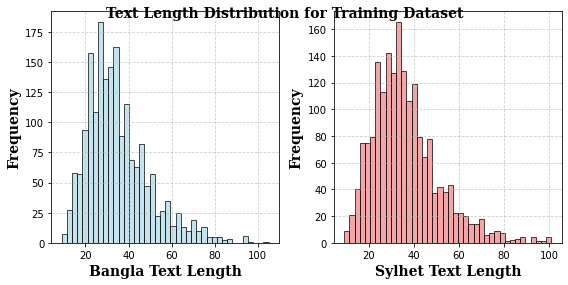

In [ ]:
visualize_text_length(train_data, 'Training Dataset')

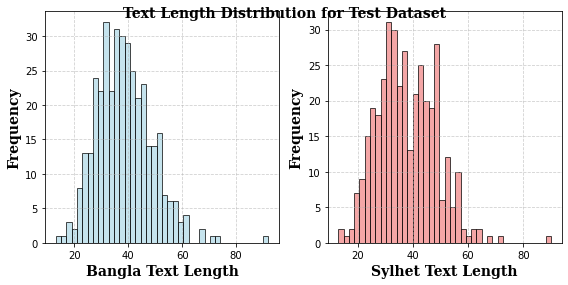

In [ ]:
visualize_text_length(test_data , 'Test Dataset')

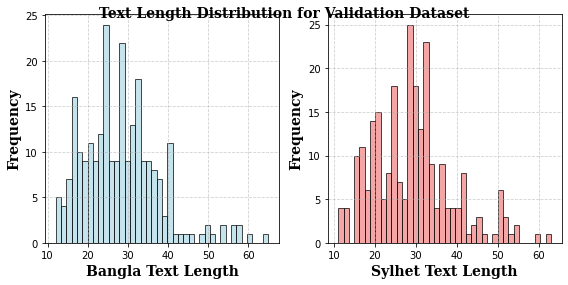

In [ ]:
visualize_text_length(validation_data, 'Validation Dataset')

# **Define a function to visualize word count distribution**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_word_count(data, title):
    # calculate the word count for each entry in the 'bangla_speech' and 'sylhet_bangla_speech' columns and store the results in new columns
    data['bangla_speech_word_count'] = data['bangla_speech'].apply(lambda x: len(str(x).split()))
    data['sylhet_bangla_speech_word_count'] = data['sylhet_bangla_speech'].apply(lambda x: len(str(x).split()))

    # Create a figure with a larger size
    plt.figure(figsize=(8, 4))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for 'Bangla Speech' word count distribution
    plt.subplot(1, 2, 1)
    plt.hist(data['bangla_speech_text_length'], bins=40, color='lightgreen', edgecolor='black', alpha=0.7, label='Bangla Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    # Second subplot for 'Sylhet Bangla Speech' text length distribution
    plt.subplot(1, 2, 2)
    plt.hist(data['sylhet_bangla_speech_text_length'], bins=40, color='lightgoldenrodyellow', edgecolor='black', alpha=0.7, label='Sylhet Bangla Speech')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Sylhet Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')


    # Set a single title for the entire figure
    plt.suptitle(f'Word Count Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')
    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


# **Visualize word count distribution for each dataset**

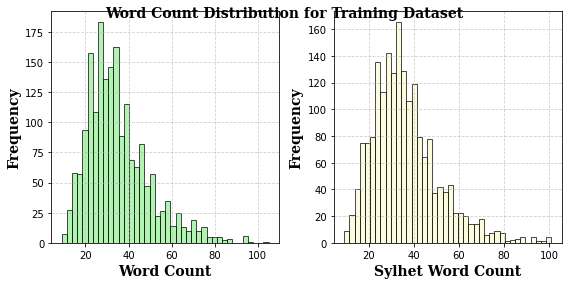

In [ ]:
visualize_word_count(train_data , 'Training Dataset')

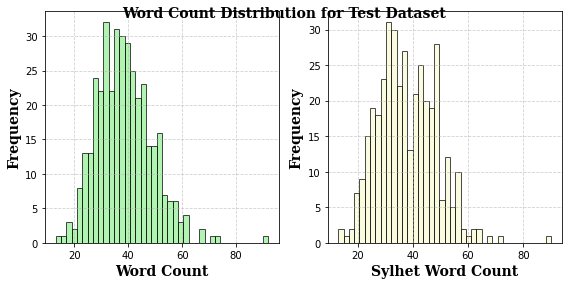

In [ ]:
visualize_word_count(test_data , 'Test Dataset')

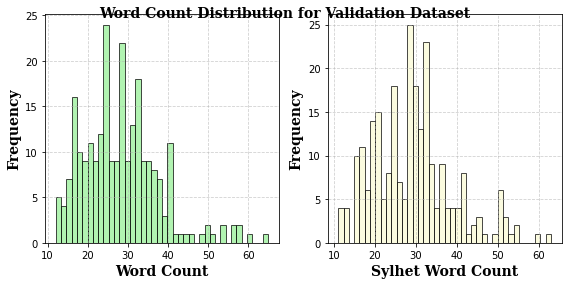

In [ ]:
visualize_word_count(validation_data, 'Validation Dataset')

In [ ]:
!pip install Pillow
from PIL import ImageDraw

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a function to create a wordcloud
def create_wordcloud(data, column, title):
    text = ' '.join(data[column])
    wordcloud = WordCloud(width=800, height=400, background_color='black', font_path='path/to/font.ttf', colormap='viridis', collocations=False).generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()



DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# **Define a function to create a word cloud**

In [ ]:
from wordcloud import WordCloud

def create_wordcloud(data, column, title):
    # Specify a Bangla-supported font, such as "Siyam Rupali"
    font_path = "F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Siyam Rupali.ttf"


    #This setting disables the detection of collocations (multi-word phrases) to focus on individual words.
    wordcloud = WordCloud(width=800, height=400, background_color='black', font_path=font_path, colormap='viridis', collocations=False).generate(' '.join(data[column]))

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='white')
    plt.axis('off')
    plt.show()


In [ ]:
create_wordcloud(train_data,'bangla_speech','Training Set')

OSError: cannot open resource

In [ ]:
create_wordcloud(test_data, 'bangla_speech', 'Test Set')


In [ ]:
create_wordcloud(validation_data, 'bangla_speech', 'Validation Set')

In [ ]:
create_wordcloud(train_data, 'sylhet_bangla_speech', 'Training Set')

In [ ]:
create_wordcloud(test_data, 'sylhet_bangla_speech', 'Test Set')

In [ ]:
create_wordcloud(validation_data, 'sylhet_bangla_speech', 'Validation Set')

# **Define a function to visualize the distribution of top n-grams**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import nltk
from nltk.util import ngrams

# Define a custom font with the Siyam Rupali font
custom_font = FontProperties(fname="F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Siyam Rupali.ttf")  # Replace with the path to the Siyam Rupali font file

def visualize_ngrams(data, n, title):
    # Extract words from the 'bangla_speech' and 'sylhet_bangla_speech' columns in the dataset
    bangla_words = [word for speech in data['bangla_speech'] for word in str(speech).split()]
    sylhet_bangla_words = [word for speech in data['sylhet_bangla_speech'] for word in str(speech).split()]

    # Calculate the frequency distribution of n-grams for both Bangla and Sylhet Bangla speech
    bangla_ngrams_freq = nltk.FreqDist(ngrams(bangla_words, n))
    sylhet_bangla_ngrams_freq = nltk.FreqDist(ngrams(sylhet_bangla_words, n))

    # Get the top n-grams
    bangla_top_ngrams = bangla_ngrams_freq.most_common(10)
    sylhet_bangla_top_ngrams = sylhet_bangla_ngrams_freq.most_common(10)

    # Extract n-gram text and counts
    bangla_top_ngram_text, bangla_top_counts = zip(*bangla_top_ngrams)
    sylhet_bangla_top_ngram_text, sylhet_bangla_top_counts = zip(*sylhet_bangla_top_ngrams)

    # Create a side-by-side bar plot to visualize the top n-grams
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    # Use a uniform width of 0.8 for all bars
    width = 0.8
    # Generate numeric indices for the x-axis
    x_values = range(len(bangla_top_ngram_text))
    plt.bar(x_values, bangla_top_counts,edgecolor='black', color='skyblue', alpha=0.7)
    plt.grid(linestyle='--', alpha=0.6)
    plt.title(f'Top {n}-grams for Bangla Speech in {title}', fontproperties='serif',weight='bold',size=10)
    # Set the tick labels to be the n-gram text
    plt.xticks(x_values, bangla_top_ngram_text, rotation=45, fontproperties=custom_font)

    plt.subplot(1, 2, 2)
    x_values = range(len(sylhet_bangla_top_ngram_text))
    plt.bar(x_values, sylhet_bangla_top_counts, edgecolor='black', color='salmon', alpha=0.7)
    plt.grid(linestyle='--', alpha=0.6)
    plt.title(f'Top {n}-grams for Sylhet Bangla Speech in {title}', fontproperties='serif',weight='bold',size=10)
    plt.xticks(x_values, sylhet_bangla_top_ngram_text, rotation=45, fontproperties=custom_font)

    plt.tight_layout()
    plt.show()




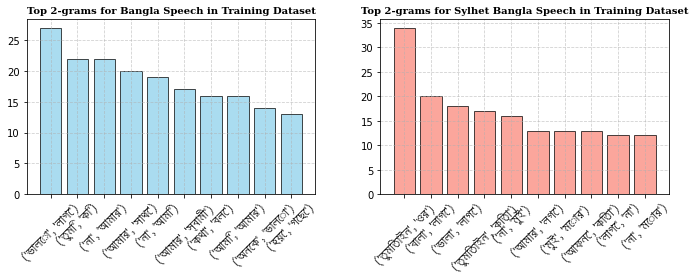

In [ ]:
visualize_ngrams(train_data, 2, 'Training Dataset')

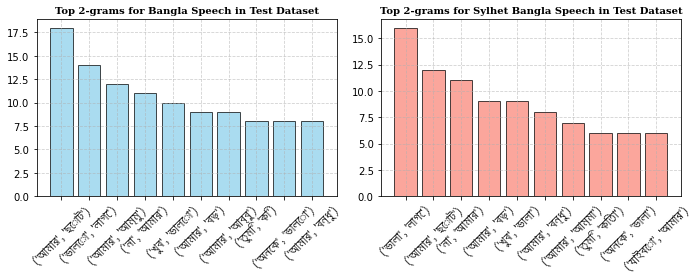

In [ ]:
visualize_ngrams(test_data , 2,'Test Dataset')

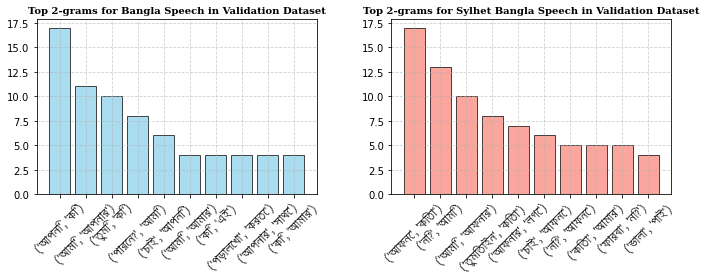

In [ ]:
visualize_ngrams(validation_data , 2,'Validation Dataset')

In [ ]:
!pip install transformers torch pandas

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install sacrebleu

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install rouge_score

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install sentencepiece

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install transformers[sentencepiece]

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.



   ---------------------------------------- 1.2/1.2 MB 623.4 kB/s eta 0:00:00
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.2.0
    Uninstalling sentencepiece-0.2.0:
      Successfully uninstalled sentencepiece-0.2.0


In [ ]:
!transformers-cli cache clear

usage: transformers-cli <command> [<args>]
Transformers CLI tool: error: invalid choice: 'cache' (choose from 'convert', 'download', 'env', 'run', 'serve', 'login', 'whoami', 'logout', 's3_datasets', 'upload', 'repo', 'add-new-model', 'lfs-enable-largefiles', 'lfs-multipart-upload')


In [ ]:
!pip install transformers[torch]

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install accelerate -U

   -------------------------------------- 297.6/297.6 kB 705.9 kB/s eta 0:00:00
  Attempting uninstall: accelerate

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



    Found existing installation: accelerate 0.20.3
    Uninstalling accelerate-0.20.3:
      Successfully uninstalled accelerate-0.20.3


In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to c:\users\sourav biswas\appdata\local\temp\pip-req-build-mn0enohh
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer 'C:\Users\Sourav biswas\AppData\Local\Temp\pip-req-build-mn0enohh'
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install --upgrade pip

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install transformers==4.10.3

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install torch transformers

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install accelerate==0.20.3

  Using cached accelerate-0.20.3-py3-none-any.whl.metadata (17 kB)
Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.29.3
    Uninstalling accelerate-0.29.3:
      Successfully uninstalled accelerate-0.29.3


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, DataCollatorForSeq2Seq, Trainer, TrainingArguments
from normalizer import normalize
import pandas as pd
import numpy as np
import nltk
from nltk.translate.bleu_score import corpus_bleu
from sacrebleu import sentence_bleu
from rouge_score import rouge_scorer
from sklearn.model_selection import train_test_split
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_data = pd.read_csv("/content/Sylhet_Translation_Main_Train_Dataset.csv")
test_data = pd.read_csv("/content/Sylhet_Translation_Main_Test_Dataset.csv")
validation_data = pd.read_csv("/content/Sylhet_Translation_Main_Validation_Dataset.csv")

In [ ]:
train_data.head()

,bangla_speech,banglish_speech,sylhet_bangla_speech,sylhet_banglish_speech,region_name,english_speech,bangla_speech_text_length,sylhet_bangla_speech_text_length,bangla_speech_word_count,sylhet_bangla_speech_word_count
0,কেমন আছো ?,kemon acho?,ভালা আছনি?,vala achoni?,Sylhet,How are you?,10,10,3,2
1,আজকে আমার মন ভালো নেই,ajke amr mon valo nei,আইজকু আমার মন ভালা নায়,aijku amar mon vala nay,Sylhet,I'm not feeling well today,21,22,5,5
2,তুমি কি করো ?,tumi ki koro?,তুমি কিতা খরো?,tumi kita khoro?,Sylhet,what are you doing,13,14,4,3
3,এই গরমে আমার কিছু ভালো লাগে না,ei gorome amar kichu valo lage na,অউ গরমো আমার কুনতা ভালা লাগের না,ou gormo amar kunta vala lager na,Sylhet,I don't like anything this summer,30,32,7,7
4,ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল,cheleti sada ronger ekti shirt pore eshechilo,ফুয়াটায় এখটা সাদা রংগর শার্ট পিন্দিয়া আইছিল,fuyatay ekhta sada ronggor shirt pindiya aichilo,Sylhet,The boy came wearing a white shirt,39,43,7,7


In [ ]:
# Rename the columns to match the expected format
train_data.rename(columns={'sylhet_bangla_speech': 'input_text', 'bangla_speech': 'labels'}, inplace=True)
train_data.head()

,labels,banglish_speech,input_text,sylhet_banglish_speech,region_name,english_speech
0,কেমন আছো ?,kemon acho?,ভালা আছনি?,vala achoni?,Sylhet,How are you?
1,আজকে আমার মন ভালো নেই,ajke amr mon valo nei,আইজকু আমার মন ভালা নায়,aijku amar mon vala nay,Sylhet,I'm not feeling well today
2,তুমি কি করো ?,tumi ki koro?,তুমি কিতা খরো?,tumi kita khoro?,Sylhet,what are you doing
3,এই গরমে আমার কিছু ভালো লাগে না,ei gorome amar kichu valo lage na,অউ গরমো আমার কুনতা ভালা লাগের না,ou gormo amar kunta vala lager na,Sylhet,I don't like anything this summer
4,ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল,cheleti sada ronger ekti shirt pore eshechilo,ফুয়াটায় এখটা সাদা রংগর শার্ট পিন্দিয়া আইছিল,fuyatay ekhta sada ronggor shirt pindiya aichilo,Sylhet,The boy came wearing a white shirt


In [ ]:
test_data.head()

In [ ]:
# Rename the columns to match the expected format
test_data.rename(columns={'sylhet_bangla_speech': 'input_text', 'bangla_speech'	: 'labels'}, inplace=True)
test_data.head()

,labels,banglish_speech,input_text,sylhet_banglish_speech,region_name,english_speech
0,তোমার আব্বু কেমন আছে?,tomar abbu kemon ache?,তোমার আব্বা বালা আছইন নি?,tomar abba bala achoin ni?,Sylhet,How is your father?
1,আমার বড় বোনের আজকে মন ভালো নেই,amar boro boner ajke mon valo nei,আমার বড় বইনর আইজ মন ভালা নায়,amar boro boinor aij mon vala nay,Sylhet,My elder sister is not feeling well today
2,তুমি কি আমাকে এই কাজটি করে দিতে পারবে?,tumi ki amake ei kajti kore dite parbe?,তুমি কিতা মোরে এই কাজটা করাই দিতা পারবা নি?,tumi kita more ei kajta korai dita parba ni?,Sylhet,Can you do this for me?
3,এই গরমে বাহিরে বের হতে ইচ্ছা করে না,ei gorome bahire ber hote iccha kore na,এই গরমো বাইরে বাইর অইতে জানে কয় না,ei gormo baire bair oite jane koy na,Sylhet,Don't want to go out in this summer
4,তোমার সব কথাই ভুল,tomar sob kothai vul,তোমার সব মাত ভুল,tomar sob mat vul,Sylhet,Everything you say is wrong


In [ ]:
validation_data.head()

In [ ]:
# Rename the columns to match the expected format
validation_data.rename(columns={'sylhet_bangla_speech': 'input_text', 'bangla_speech'	: 'labels'}, inplace=True)
validation_data.head()

,labels,banglish_speech,input_text,sylhet_banglish_speech,region_name,english_speech
0,বাংলাদেশে ৬৪ টা জেলা,bangladeshe ৬৪ ta jela,বাংলাদেশো ৬৪ টা জেলা,bangladesho ৬৪ ta jela,Sylhet,64 districts in Bangladesh
1,আমরা সবাই গতকাল বাহিরে গিয়েছিলাম,amra sobai gotokal bahire giyechilam,আমরা হকল গতকাইল বাহিরো গিয়েছিলাম,amra hokol gotokail bahiro giyechilam,Sylhet,We all went out yesterday
2,তোমার কথা বলার ধরন অনেক সুন্দর,tomar kotha bolar dhoron onek sundor,তোমার মাত বলার ধরন বহুত সুন্দর,tomar mat bolar dhoron bohut shundor,Sylhet,Your way of speaking is very nice
3,বরিশালের মানুষ কেমন হয়?,barishaler manush kemon hoy?,বরিশালর মানুষ কিলা অইন?,barishalor manush kila oin?,Sylhet,How are the people of Barisal?
4,খুলনা জেলা কি অনেক সুন্দর?,khulna jela ki onek sundor?,খুলনা জেলা কিতা বহুত সুন্দর?,khulna jela kita bohut shundor?,Sylhet,Khulna district is very beautiful?


In [ ]:
model_name = "csebuetnlp/banglat5"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Save the model
model.save_pretrained("F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Saved_Models\sylhet_model.pt")

# Save the tokenizer
tokenizer.save_pretrained("F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Saved_Models\sylhet_tokenizer.json")

('F:\\DOWNLOAD\\Vashantor_CSV_Format\\Vashantor_CSV_Format\\Saved_Models\\sylhet_tokenizer.json\\tokenizer_config.json',
 'F:\\DOWNLOAD\\Vashantor_CSV_Format\\Vashantor_CSV_Format\\Saved_Models\\sylhet_tokenizer.json\\special_tokens_map.json',
 'F:\\DOWNLOAD\\Vashantor_CSV_Format\\Vashantor_CSV_Format\\Saved_Models\\sylhet_tokenizer.json\\spiece.model',
 'F:\\DOWNLOAD\\Vashantor_CSV_Format\\Vashantor_CSV_Format\\Saved_Models\\sylhet_tokenizer.json\\added_tokens.json')

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class Seq2SeqDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        """
        Args:
            data: A DataFrame containing 'input_text' and 'labels' columns.
            tokenizer: A Hugging Face tokenizer.
            max_length: Maximum sequence length.
        """
        self.input_text = data['input_text'].apply(normalize).tolist()
        self.labels = data['labels'].apply(normalize).tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.input_text)

    def __getitem__(self, idx):
        input_text = self.input_text[idx]
        label_text = self.labels[idx]

        # Tokenize the input text
        input_encodings = self.tokenizer(
            input_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Tokenize the label text to get its 'input_ids' and 'attention_mask'
        label_encodings = self.tokenizer(
            label_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': input_encodings['input_ids'].squeeze(),
            'attention_mask': input_encodings['attention_mask'].squeeze(),
            'labels': label_encodings['input_ids'].squeeze(),
        }


In [ ]:
# Create train , test and validation datasets
train_dataset = Seq2SeqDataset(train_data, tokenizer)
test_dataset = Seq2SeqDataset(test_data, tokenizer)
validation_dataset = Seq2SeqDataset(validation_data, tokenizer)

# Create train , test and validation dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)  #batch_size=32
test_dataloader = DataLoader(test_dataset, batch_size=16) #batch_size=32
validation_dataloader = DataLoader(validation_dataset, batch_size=16) #batch_size=32


# **For training dataset**

In [ ]:
# Assuming you have already created the train_dataloader
for data_point in train_dataloader:
    input_ids = data_point['input_ids']
    attention_mask = data_point['attention_mask']
    labels = data_point['labels']

    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


Input IDs: tensor([[   18,  1752,  1142,  ...,     0,     0,     0],
        [   36,    18,    63,  ...,     0,     0,     0],
        [12377,  2114,   100,  ...,     0,     0,     0],
        ...,
        [ 1968,  1261, 14584,  ...,     0,     0,     0],
        [ 1270,  9316,   283,  ...,     0,     0,     0],
        [   22,    10,    11,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([[  18, 1752, 1142,  ...,    0,    0,    0],
        [  36,   18, 1026,  ...,    0,    0,    0],
        [1116, 1443,   74,  ...,    0,    0,    0],
        ...,
        [1968, 7147, 3819,  ...,    0,    0,    0],
        [  18,  283,  283,  ...,    0,    0,    0],
        [ 136,  248,   33,  ...,    0,    0,    0]])
Input IDs: tensor([[17032, 18562,   277,  ...,     0,     0

# **For test dataset**

In [ ]:
# Assuming you have already created the test_dataloader
for data_point in test_dataloader:
    input_ids = data_point['input_ids']
    attention_mask = data_point['attention_mask']
    labels = data_point['labels']

    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)

Input IDs: tensor([[ 108, 6266, 8982,  ...,    0,    0,    0],
        [  22,  118,  536,  ...,    0,    0,    0],
        [  88,   29,  192,  ...,    0,    0,    0],
        ...,
        [  22, 3775, 3665,  ...,    0,    0,    0],
        [  22, 3226, 6603,  ...,    0,    0,    0],
        [  22,  460, 4441,  ...,    0,    0,    0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([[ 108, 6176,  273,  ...,    0,    0,    0],
        [  22,  118, 3496,  ...,    0,    0,    0],
        [  88,   29,  136,  ...,    0,    0,    0],
        ...,
        [  22, 3775, 3665,  ...,    0,    0,    0],
        [  22, 3226, 6603,  ...,    0,    0,    0],
        [  22,  460, 4441,  ...,    0,    0,    0]])
Input IDs: tensor([[   22,   264,  7750,  ...,     0,     0,     0],
        [ 1270,    13,  31

# **For validation dataset**

In [ ]:
# Assuming you have already created the validation_dataloader
for data_point in validation_dataloader:
    input_ids = data_point['input_ids']
    attention_mask = data_point['attention_mask']
    labels = data_point['labels']

    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)

Input IDs: tensor([[  249,   280,  8007,  ...,     0,     0,     0],
        [   89,   963,   166,  ...,     0,     0,     0],
        [  108, 13064,   773,  ...,     0,     0,     0],
        ...,
        [   88,   212,  5289,  ...,     0,     0,     0],
        [   14,   391,    29,  ...,     0,     0,     0],
        [16870,   155,   167,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([[  948,  8007,   238,  ...,     0,     0,     0],
        [   89,   198,   369,  ...,     0,     0,     0],
        [  108,    39,   773,  ...,     0,     0,     0],
        ...,
        [   88,   212,  5289,  ...,     0,     0,     0],
        [   14,   391,    29,  ...,     0,     0,     0],
        [16870,   155,   167,  ...,     0,     0,     0]])
Input IDs: tensor([[   

# **from training dataset , I have done only one example decoding**

In [ ]:
# Assuming you have already created the train_dataloader with shuffle
for data_point in train_dataloader:
    input_ids = data_point['input_ids'][0]  # Assuming you want the first example
    attention_mask = data_point['attention_mask'][0]
    labels = data_point['labels'][0]

    # Decode input_ids and labels
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    output_text = tokenizer.decode(labels, skip_special_tokens=True)

    print("Input Text:", input_text)
    print("Output Text:", output_text)

    # Exit the loop after processing the first example
    break


Input Text: তুমিতাইন কোন ক্লাস-ও পড়রায়?
Output Text: তুমি কোন ক্লাসে পড়ো?


# **from testing dataset , I have done only one example decoding**

In [ ]:
# Assuming you have already created the test_dataloader
for data_point in test_dataloader:
    input_ids = data_point['input_ids'][0]  # Assuming you want the first example
    attention_mask = data_point['attention_mask'][0]
    labels = data_point['labels'][0]

    # Decode input_ids and labels
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    output_text = tokenizer.decode(labels, skip_special_tokens=True)

    print("Input Text:", input_text)
    print("Output Text:", output_text)

    # Exit the loop after processing the first example
    break


Input Text: তোমার আব্বা বালা আছইন নি?
Output Text: তোমার আব্বু কেমন আছে?


# **from validation dataset , I have done only one example decoding**

In [ ]:
# Assuming you have already created the validation_dataloader
for data_point in validation_dataloader:
    input_ids = data_point['input_ids'][0]  # Assuming you want the first example
    attention_mask = data_point['attention_mask'][0]
    labels = data_point['labels'][0]

    # Decode input_ids and labels
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    output_text = tokenizer.decode(labels, skip_special_tokens=True)

    print("Input Text:", input_text)
    print("Output Text:", output_text)

    # Exit the loop after processing the first example
    break


Input Text: বাংলাদেশো ৬৪ টা জেলা
Output Text: বাংলাদেশে ৬৪ টা জেলা


In [ ]:
# Move the model to the device (CPU or GPU)
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedGeluDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo)

In [ ]:
from transformers import TrainingArguments
from transformers import AdamW

from torch.optim import AdamW

# Create a custom optimizer using torch.optim.AdamW
custom_optimizer = AdamW(
    model.parameters(),
    lr=1e-3,  # Learning rate
    eps=1e-8,  # Epsilon value to prevent division by zero
    weight_decay=0.01,  # Weight decay (L2 regularization)
)

#if you have 1,000 training examples and a batch size of 100, you would have 10 iterations in each epoch (1,000 / 100 = 10)
'''
This parameter determines how many small batches are accumulated before performing a weight update.
In your code, it's set to 8, which means you'll accumulate gradients over 8 small batches before performing a weight update.
This effectively simulates a larger batch size without requiring more GPU memory.
So, you are updating the model's weights less frequently compared to the number of actual batches processed.
'''



'''
Learning rate determines how quickly the model learns from the data.
The learning rate scheduler type is set to "cosine_with_restarts," which is a type of learning rate schedule.
 Warmup steps are the number of initial training steps with a smaller learning rate, and weight decay introduces L2 regularization to the optimizer.
'''



'''
Number of Iterations per Epoch = Number of Training Samples / Batch Size
Total Iterations = Number of Iterations per Epoch * Number of Epochs
'''
# Define the TrainingArguments
training_args = TrainingArguments(
    output_dir='F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Saved_Models',
    num_train_epochs=50,
    per_device_train_batch_size=6,
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 small batches
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=2,
    save_steps=2000,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=True,
    lr_scheduler_type="cosine_with_restarts",  # Set the learning rate scheduler type
    warmup_steps=100,  # Number of warmup steps
    weight_decay=0.01,  # Weight decay (L2 regularization)
    logging_dir='F:\DOWNLOAD\Vashantor_CSV_Format\Vashantor_CSV_Format\Saved_Models',  # Use the same directory for logs
    logging_steps=100,  # Log every 500 steps
)


PyTorch: setting up devices


In [ ]:
from transformers import DataCollatorForSeq2Seq

# Create a data collator for sequence-to-sequence tasks
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,  # Your Hugging Face tokenizer
    model=model,
    padding=True,
    max_length=128,
    label_pad_token_id=tokenizer.pad_token_id,
)


In [ ]:

# Define the Trainer with the custom optimizer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),  # Pass the custom optimizer here
)


In [ ]:
import torch

def custom_collator(features):
    # Ensure labels are tensors
    for feature in features:
        if isinstance(feature["labels"], list):
            feature["labels"] = torch.tensor(feature["labels"], dtype=torch.long)

    # Use a standard data collator to handle padding and batching
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    return data_collator(features)


# **Training start here**

In [ ]:
# Fine-tune the model
trainer.train()

***** Running training *****
  Num examples = 1875
  Num Epochs = 50
  Instantaneous batch size per device = 6
  Total train batch size (w. parallel, distributed & accumulation) = 48
  Gradient Accumulation steps = 8
  Total optimization steps = 1950


TypeError: unsupported operand type(s) for +: 'Tensor' and 'list'

# **Saving model and tokenizer**

In [ ]:
from transformers import AutoModelForSeq2SeqLM

# Save the model
model.save_pretrained("/content/drive/MyDrive/movie/sylhet_model.pt")

# Save the tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/movie/sylhet_tokenizer.json")


# **Loading trained model and tokenizer**

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load the saved model
model = AutoModelForSeq2SeqLM.from_pretrained("/content/drive/MyDrive/movie/sylhet_model.pt")

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/movie/sylhet_tokenizer.json")


In [ ]:
!pip install datasets

In [ ]:
!pip install python-Levenshtein

In [ ]:
!pip install jiwer

In [ ]:
# Move the model to the device (CPU or GPU)
model.to(device)

In [ ]:
!pip install rouge-score
#https://github.com/google-research/google-research/tree/master/rouge
#https://huggingface.co/spaces/evaluate-metric/rouge [Different types of ROUGE scores]

In [ ]:
!pip install evaluate

# **Loading evaluation metrics**

In [ ]:
import torch
import Levenshtein
from evaluate import load
# Define the move_to_device function
def move_to_device(batch, device):
    if isinstance(batch, torch.Tensor):
        return batch.to(device)
    elif isinstance(batch, list):
        return [move_to_device(item, device) for item in batch]
    elif isinstance(batch, dict):
        return {key: move_to_device(value, device) for key, value in batch.items()}
    else:
        return batch  # If it's not a tensor, list, or dict, leave it as is

# Load the evaluation metric for Character Error Rate (CER) and Word Error Rate (WER) and Exact Match(em)
cer_metric = load("cer")
wer_metric = load("wer")
meteor = load('meteor')
exact_match_metric = load("exact_match")

# Load BLEU and ROUGE metrics
bleu_metric = load("bleu")
rouge_metric = load('rouge')

# Initialize lists to store generated translations and references
generated_translations = []
references = []

# Generate translations for the test dataset
for batch in test_dataloader:
    # Move the batch to CUDA
    batch = move_to_device(batch, 'cuda')

    input_text = batch['input_ids']  # Access the input_text using the correct key
    labels = batch['labels']  # Access the labels using the correct key

    # Generate translations
    translation_ids = model.generate(input_text, max_length=512, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Move the translation_ids to CPU to decode
    translation_ids = translation_ids.to('cpu')

    generated_translation = tokenizer.batch_decode(translation_ids, skip_special_tokens=True)

    generated_translations.extend(generated_translation)
    references.extend(tokenizer.batch_decode(labels, skip_special_tokens=True))  # Decoding the label IDs

# Make sure to move generated_translations back to CPU for evaluation if necessary
generated_translations = [translation if not isinstance(translation, str) else translation for translation in generated_translations]



In [ ]:
print("Number of generated translations:", len(generated_translations))
print("Number of references:", len(references))

In [ ]:
print(generated_translations)

In [ ]:
print(references)

In [ ]:
# Calculate Character Error Rate (CER) and Word Error Rate (WER)
results_CER = cer_metric.compute(predictions=generated_translations, references=references)
results_WER = wer_metric.compute(predictions=generated_translations, references=references)

# Calculate Exact Match (EM) and METEOR(M)
results_em = exact_match_metric.compute(predictions=generated_translations, references=references)
results_met = meteor.compute(predictions=generated_translations, references=references)

# Calculate Bilingual Evaluation Understudy (BLEU) and Recall-Oriented Understudy for Gisting Evaluation (ROUGE)
results_bleu = bleu_metric.compute(predictions=generated_translations, references=references)
results_rouge = rouge_metric.compute(predictions=generated_translations, references=references)


# Calculate Levenshtein Distance
levenshtein_distances = [Levenshtein.distance(generated, reference) for generated, reference in zip(generated_translations, references)]


# **Printing every evaluation metrics**

In [ ]:
print(results_CER)
print(results_WER)
print(results_em)
print(results_met)
print(results_bleu)
print(results_rouge)
print(levenshtein_distances)

In [ ]:
total_correct = 0
total_samples = len(references)

for generated, reference in zip(generated_translations, references):
    levenshtein_distance = Levenshtein.distance(generated, reference)
    max_length = max(len(generated), len(reference))
    accuracy = 1 - (levenshtein_distance / max_length)
    if accuracy >= 0.8:  # Adjust the threshold as needed
        total_correct += 1

accuracy = total_correct / total_samples
print("Accuracy:", accuracy)


# **Saving input text(Sylheti Language) , labels(normal bangla) and generated translations to csv**

In [ ]:
import pandas as pd

# Create a DataFrame to store translations
translation_df = pd.DataFrame({
    'input_text': test_data['input_text'],  # Assuming 'test_data' contains your test dataset
    'labels': references,
    'translations': generated_translations
})

# Save translations to a CSV file
# Save translations to a CSV file
translation_df.to_excel('/content/sample_data/sylhet_translations_BanglaT5.xlsx', index=False)
